In [65]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [88]:
base_dir = '../../data/pancancer/TCGA/mutation/download_new/'
ultra_mutator_file = '../../data/pancancer/TCGA/mutation/ultramutated_tumor_ids'
all_qvalues = []
ctypes = []

# scan through directories to find the mutsigcv result files
for dname in os.listdir(base_dir):
    ctype_dir = os.path.join(base_dir, dname)
    if os.path.isdir(ctype_dir):
        for mutsigcvfile in os.listdir(ctype_dir):
            if mutsigcvfile.endswith('.sig_genes.txt'):
                # get the cancer type (study name from TCGA)
                ctype = mutsigcvfile.split('.')[1]
                ctypes.append(ctype)
                # get the q-values from mutsigcv
                full_path = os.path.join(base_dir, dname, mutsigcvfile)
                mutsigcv_qvalues = pd.read_csv(full_path, sep='\t').set_index('gene').q
                all_qvalues.append(mutsigcv_qvalues)

# create dataframe with all information inside
gene_ctype_matrix = pd.DataFrame(all_qvalues, index=ctypes).T
smallest_qvalue = gene_ctype_matrix[gene_ctype_matrix != 0].min().min()
print ("Smallest q-value in the data (0 will be replaced with it): {}".format(smallest_qvalue))
# take the -log10 of the q-values, according to what they did for HotNet2
gene_ctype_matrix[gene_ctype_matrix == 0] = smallest_qvalue
mutation_matrix = -np.log10(gene_ctype_matrix)

Smallest q-value in the data (0 will be replaced with it): 1.4957879999999997e-13


In [89]:
mutation_matrix[mutation_matrix.index == 'TP53']

,READ,STAD,LUAD,CESC,ESCA,UCEC,BRCA,LIHC,KIRP,COAD,LUSC,HNSC,THCA,BLCA,KIRC,PRAD
TP53,11.281062,12.82513,11.679002,2.674688,12.82513,12.82513,12.82513,12.82513,0.039382,12.82513,12.82513,12.82513,-0.0,11.470726,1.959328,11.020461


<BarContainer object of 30 artists>

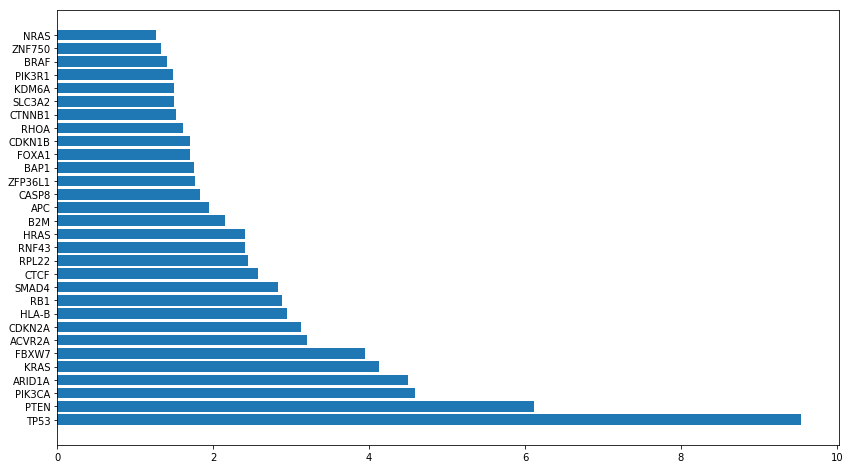

In [102]:
fig = plt.figure(figsize=(14, 8))
most_highly_mutated_genes = mutation_matrix.mean(axis=1).sort_values(ascending=False).head(30)
plt.barh(y=most_highly_mutated_genes.index,
         width=most_highly_mutated_genes)

In [104]:
mutation_matrix.to_csv('../../data/pancancer/mutsigcv/mutsigcv_genescores.csv', sep='\t')

In [105]:
mutation_matrix

,READ,STAD,LUAD,CESC,ESCA,UCEC,BRCA,LIHC,KIRP,COAD,LUSC,HNSC,THCA,BLCA,KIRC,PRAD
A1BG,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
A1CF,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
A2BP1,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
A2LD1,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
A2M,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
A2ML1,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
A4GALT,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
A4GNT,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
AAAS,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
AACS,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
